# Mini Project - Part 1
Untuk memuaskan rasa ingin tahu, aku ingin mencoba menggunakan logistic regression. Logistic regression juga merupakan algoritma klasifikasi (logistic regression berbeda dengan regression).

Aku tahu logistic regression lebih umum digunakan untuk memodelkan probabilitas dari kelas tertentu, seperti ya/tidak, lulus/gagal, sakit/sehat, di mana berarti target merupakan kelas biner. Namun karena penasaran, aku ingin mencoba apakah hasil dari algoritma logistic regression untuk data dengan kelas banyak juga akan memberikan performa yang baik.

In [1]:
#Mengimport library Pandas
import pandas as pd
pd.set_option("display.max_column", 10)
#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
#Membuat dataset
dataset = dataset_credit_scoring[['pendapatan_setahun_juta',
                                  'kpr_aktif',
                                  'durasi_pinjaman_bulan',
                                  'jumlah_tanggungan',
                                  'rata_rata_overdue',
                                  'risk_rating']]

In [2]:
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])

<ipython-input-2-602a347f4002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])


In [3]:
#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}
dataset = dataset.replace(mapping_dict)

In [4]:
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)

In [5]:
#Input variabel X dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
X = dataset.drop('risk_rating',1)
#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')

<ipython-input-5-3f115cf8817f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('risk_rating',1)


In [6]:
#Membagi data training dan data testing
from sklearn.model_selection import train_test_split
#splitting data train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Import library LogisticRegression
from sklearn.linear_model import LogisticRegression
#Membuat Objek model_lr
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [8]:
#Menjalankan data testing
y_predict= model_lr.predict(X_test)

In [9]:
#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

Accuracy score:  0.8722222222222222


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

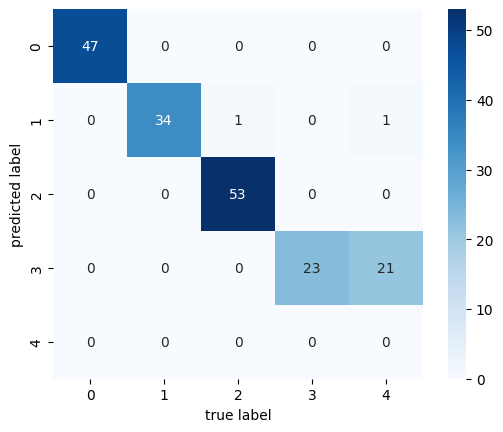

In [11]:
#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Mini Project - Part 2
Aku belum puas mencoba dengan logistic regression, aku mau mencoba satu algoritma lagi, yaitu SVM karena SVM juga salah satu algoritma yang umum digunakan untuk klasifikasi data.

In [12]:
#Import library SVM
from sklearn import svm
#Membuat Objek model_svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
#Menjalankan data testing
y_predict = model_svm.predict(X_test)

In [14]:
#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

Accuracy score:  1.0


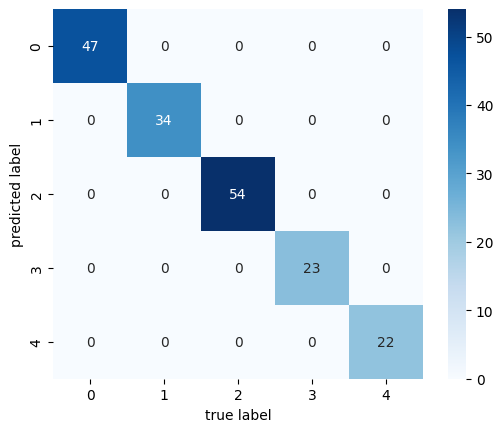

In [15]:
#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()